### Circuit de Deutsch-Josza pour n=2

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

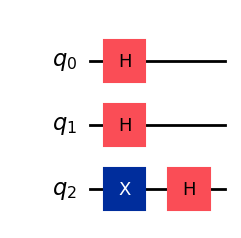

In [6]:
Stateprep = QuantumCircuit(3, name='Stateprep')
Stateprep.h([0,1])
Stateprep.x(2)
Stateprep.h(2)

Stateprep.draw('mpl')

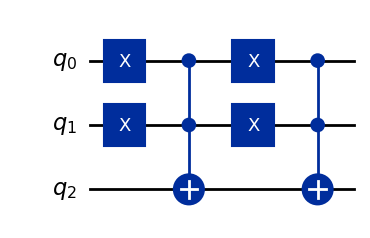

In [5]:
# fonction f=1 ssi x=y=0 ou x=y=1 (balancée)
Uf = QuantumCircuit(3, name='Uf')

Uf.x([0,1])
Uf.ccx(0,1,2)
Uf.x([0,1])
Uf.ccx(0,1,2)

Uf.draw('mpl')

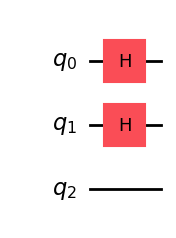

In [12]:
A = QuantumCircuit(3, name = 'Analyse')
A.h([0,1])
A.draw('mpl')

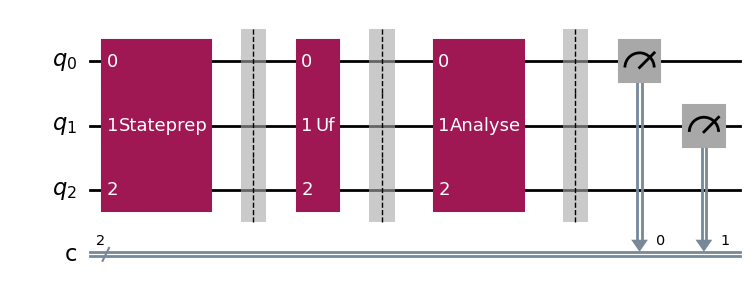

In [13]:
### Algorithme de Deutsch-Josza au complet
from qiskit import QuantumRegister, ClassicalRegister

##First we create the circuit, we use 3 register, 1 for the variables, 1 for the clauses and 1 for y where we will stock f
QC = QuantumCircuit(3, 2)
QC.append(Stateprep, [0,1,2])
QC.barrier()
QC.append(Uf, [0,1,2])
QC.barrier()
QC.append(A, [0,1,2])
QC.barrier()
QC.measure(0,0)
QC.measure(1,1)
QC.draw('mpl')

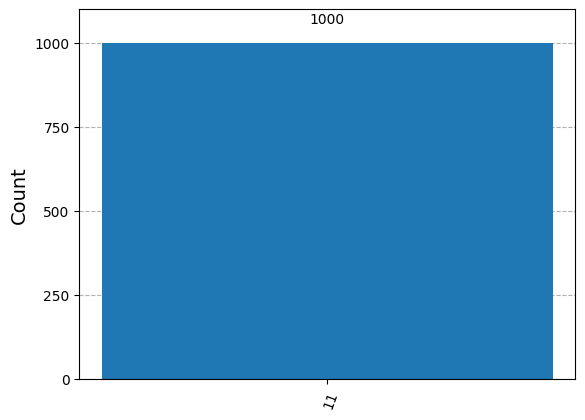

In [17]:
# plot du résultat de la mesure: si celui-ci vaut 00, la fonction f est constante,
# s'il ne vaut pas 00, la fonction est balancée

from qiskit_aer import AerSimulator

simulator = AerSimulator()
transpiled_circuit = transpile(QC, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()  # obtain results of a run
counts = result.get_counts()
plot_histogram(counts)